In [ ]:
#installing dependant if not available
!pip install plotly

In [ ]:
# using goodgle drive for my data set storage and mounting drive into the session
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#library and dependents needed importations
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
# Set the display options
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
#using google drive for imporation of file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
#chaecking out data structures
print(f"The data contains {data.shape[1]} columns (features) with {data.shape[0]} total numbers of variables ")
#checking the name of the columns used in the datasets
#this gives of possible data each colums are carrying from their names
print(f"\nThe names of the columns (Features) in the data are: \n\n{data.columns}")
data.head()

The data contains 21 columns (features) with 7043 total numbers of variables 

The names of the columns (Features) in the data are: 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f'{data.info()}\n\nThe infomations on the data types and null counts are displayed')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(f'the number of the unique valuies in present in every columns are :\n{data.nunique()}')

the number of the unique valuies in present in every columns are :
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


Based on the observations, it is evident that the "CustomerID" column does not provide valuable information for data analysis and can be safely removed. Among the remaining columns, "SeniorCitizen" and "Tenure" are stored as integers (int64), while "MonthlyCharges" is stored as a floating-point number (float64). The other features are stored as character objects, indicating categorical values. By examining a sample of the data, it becomes apparent that most features are represented as characters, except for "TotalCharges," which appears to be numerical but is stored as an object. To facilitate the analysis, it is necessary to convert the data type of "TotalCharges" to a suitable numeric format.

In [ ]:
#Deleting the customerID column from the data
data = data.drop('customerID', axis = 1)
#changing the data type of the TotalCharges column
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [ ]:
#checking out the number of missing values present in the data
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Upon conducting a thorough examination of the dataset, it has come to my attention that there are 11 instances where certain values are missing, which we refer to as missing values. In the realm of data science, the presence of missing values presents a significant challenge, necessitating the adoption of appropriate strategies for handling them. There exist several methodologies for addressing missing values, including imputation techniques such as mean imputation, regression imputation, or leveraging machine learning algorithms to predict and fill in missing values.

However, considering the relatively small number of missing values in this particular analysis, I have opted for a simpler approach. Specifically, I will be employing the method of deletion, wherein the rows containing missing values will be removed from the dataset. This course of action has been chosen based on the belief that the impact on the overall analysis will be minimal, and it will facilitate the utilization of a complete and accurate dataset for subsequent procedures.

In [ ]:
#showing the index values of the missing values
print(data[data['TotalCharges'].isnull()].index)
#this further display the column with the missing values extracted from the data
data[data['TotalCharges'].isnull()]

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Dropping the Null values in the Totalcharges columns
data = data.drop(data[data['TotalCharges'].isnull()].index)
#showing the implementation of the null values removal
print(f"{data.isnull().sum()}")

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


The data contains 20 columns (features) with 7032 total numbers of variables 




<Axes: >

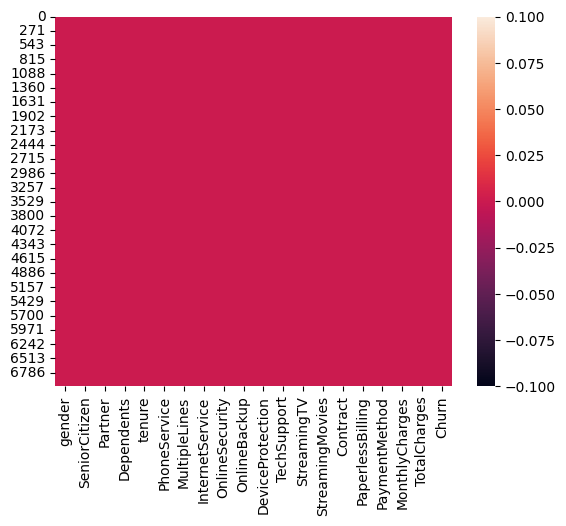

In [ ]:
#chaecking out data structures
print(f"The data contains {data.shape[1]} columns (features) with {data.shape[0]} total numbers of variables \n\n")

#visualizing the null values
sns.heatmap(data.isnull())


The dataset has undergone certain modifications in order to enhance its suitability for data science analysis. Firstly, the customerID feature has been excluded from the dataset, as it was deemed unnecessary for the current analysis. Additionally, any instances containing missing values (NA) have been eliminated from the dataset.

Following these adjustments, the dataset now consists of 7032 instances and 20 columns, reflecting the removal of irrelevant data and incomplete cases. To further ensure the absence of missing values, a heat plot was generated. The heat plot visually represents the distribution of missing values, with a uniform color indicating a value of 0.00. This observation indicates that there are no remaining missing values in the dataset, affirming the completeness and quality of the data for subsequent analysis.

In [ ]:
#Basic statistic and visualizations
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [ ]:
#showing the numerical correlation
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


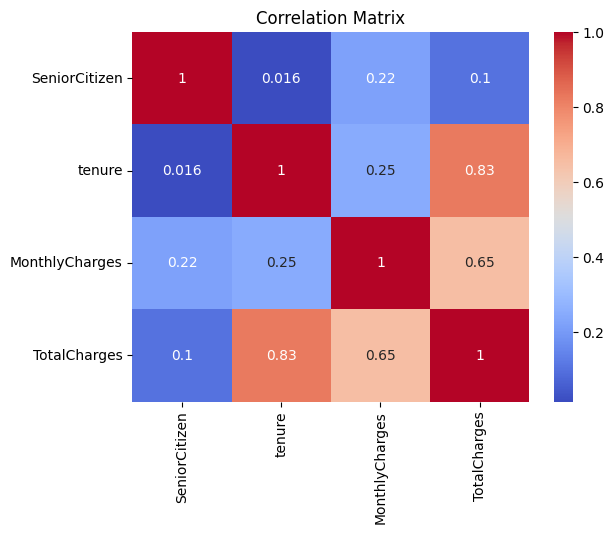

In [ ]:
#showing the correlation between the numerical values
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
#showing the corr plot
plt.show()

The correlation matrix shows that tenure has a strong positive correlation with TotalCharges, indicating that longer-tenured customers tend to have higher total charges. MonthlyCharges also have moderate positive correlations with both tenure and TotalCharges. There is a weak positive association between being a senior citizen and MonthlyCharges/TotalCharges.

In [ ]:
fig_plt= px.scatter(data, x="tenure", y="TotalCharges")
import plotly.io as pio
pio.renderers.default = 'colab'
fig_plt.update_layout(width=750, height=550)
#showing the scatter plot
fig_plt.show()

In [ ]:
# Create the pie chart
fig = go.Figure(data=go.Pie(
    labels=data['Churn'],
    values=data['TotalCharges'],
    pull=[0.05, 0] ))

# Show the pie chart
fig.show()

Text(0.5, 1.0, 'Plot showing count of Total Charges and Churn levels')

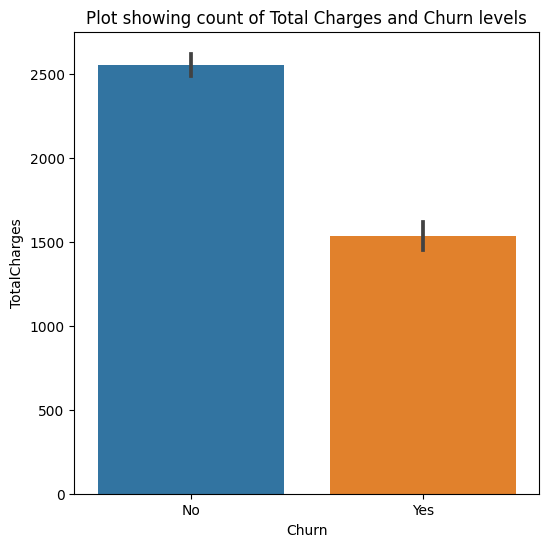

In [ ]:
#showing the distribution of the categorical values in the data
plt.figure(figsize=(6,6))
sns.barplot(data= data, y = 'TotalCharges', x = 'Churn')
plt.title('Plot showing count of Total Charges and Churn levels')

In [ ]:
# Create the pie chart
fig = go.Figure(data=go.Pie(
    labels=data['Churn'],
    values=data['tenure'],
    pull=[0.1, 0] ))

# Show the pie chart
fig.show()

Text(0.5, 1.0, 'Plot showing count of Total churn rate against tenure levels')

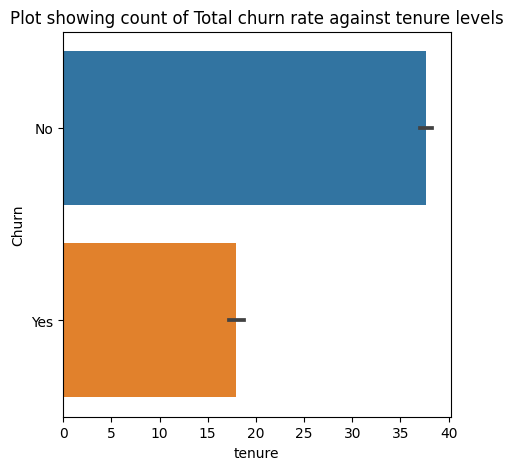

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data, x = 'tenure' , y = 'Churn')
plt.title('Plot showing count of Total churn rate against tenure levels')

In [ ]:
plot= px.histogram(data, x="Churn", color="SeniorCitizen")
import plotly.io as pio
pio.renderers.default = 'colab'
plot.update_layout(width=750, height=550)
plot.show()


In [ ]:
# Create the pie chart
fig = go.Figure(data=go.Pie(
    labels=data['Churn'],
    values=data['SeniorCitizen'],
    pull=[0.05, 0] ))

# Show the pie chart
fig.show()

In [ ]:
#checking the distribution across other categorical values
# Create the pie chart
fig = go.Figure(data=go.Pie(
    labels=data['MultipleLines'].unique(),
    values=data['MultipleLines'].value_counts(),
    pull=[0.01, 0, 0.05] ))

# Show the pie chart
fig.show()

In [ ]:
# Create the pie chart
fig = go.Figure(data=go.Pie(
    labels=data['InternetService'].unique(),
    values=data['InternetService'].value_counts(),
    pull=[0.01, 0, 0.031] ))

# Show the pie chart
fig.show()

In [ ]:
#checking the distribution across other categorical values
# Create the pie chart
fig = go.Figure(data=go.Pie(
    labels=data['PaymentMethod'].unique(),
    values=data['PaymentMethod'].value_counts(),
    pull=[0.01, 0.03, 0.02, 0.05] ))

# Show the pie chart
fig.show()

A copy of the dataset has been created to preserve the integrity of the original data. This step ensures that any modifications or transformations made during the analysis process do not affect the underlying data. Furthermore, efforts have been made to standardize the naming conventions within the dataset, ensuring that different representations or variations of the same concept are consolidated into a consistent format. This helps to eliminate ambiguity and promote clarity in the analysis and interpretation of the data.

In [ ]:
#making copy of the data set to ensure that the real data is intact
data_copied = data.copy()

def object_to_int(dataframe_series):
  '''This function recieve dtata serios in object form and transfor them into integers'''
  if dataframe_series.dtype=='object':
    dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

#processing the data to know the data types and checking for different name saved
for i in data_copied.columns:
  if data_copied[i].dtypes == 'object':
    print(f'{i} : {data_copied[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Upon examining the obtained results, it is evident that certain columns in the dataset contain variables representing binary choices, such as 'No' or 'Yes', 'No internet service', and 'No phone service'. To enhance the usability and consistency of these variables, a binary encoding scheme can be employed, transforming them into a simplified form of 'No' or 'Yes'.

Additionally, other columns in the dataset consist of more than two distinct values. To ensure compatibility with various machine learning algorithms, these categorical variables will undergo one-hot encoding. This process involves creating separate binary columns for each unique value, representing their presence or absence. By applying these encoding techniques, the data will be appropriately prepared for further analysis and modeling.

In [ ]:
data_copied.replace('No internet service', 'No', inplace= True)
data_copied.replace('No phone service', 'No', inplace=True)
#then visualizing the correction effected across the dataset
for i in data_copied.columns:
  #now selecting the columns that are in object form from the columns
  if data_copied[i].dtypes == 'object':
    print(f'{i} : {data_copied[i].unique()}')


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
#this displays the number of values more than 2
for i in data_copied.columns:
  if ( data_copied[i].dtypes == 'object') & (len(data_copied[i].unique())>2):
    print(f'{i} : {data_copied[i].unique()}')

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
#this encode the categorical values into numerical values
for i in data_copied.columns:
  if data_copied[i].dtypes == 'object':
    data_copied[i] = LabelEncoder().fit_transform(data_copied[i])

In [ ]:
data_copied.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#now coding for the columns having more than 2 distinct values
cat_three = ['InternetService', 'Contract', 'PaymentMethod']
data_copied = pd.get_dummies(data=data_copied, columns=cat_three)


In [ ]:
#now visualizing the data cleaning done so far
data_copied.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
4874,0,0,0,0,38,1,0,1,1,1,0,0,0,1,83.90,3233.60,1,0,1,0,1,0,0,0,1,0,0
4280,1,0,1,1,64,1,0,0,0,0,0,0,0,1,19.70,1274.05,0,0,0,1,0,0,1,1,0,0,0
3935,0,0,1,0,70,1,0,0,0,0,0,0,0,0,19.85,1328.35,0,0,0,1,0,0,1,0,1,0,0
4940,1,1,0,0,16,1,1,0,0,0,0,0,0,1,74.45,1261.35,0,0,1,0,1,0,0,1,0,0,0
1559,0,0,0,0,2,1,0,0,0,0,0,0,0,0,20.35,45.30,0,0,0,1,1,0,0,0,0,0,1
3381,0,0,0,0,41,1,0,1,0,1,1,1,1,1,79.85,3320.75,0,1,0,0,0,1,0,1,0,0,0
5646,1,0,0,1,1,1,0,0,0,0,0,0,0,0,19.25,19.25,1,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
6770,0,0,1,1,4,1,0,0,0,0,0,1,0,1,78.90,299.75,0,0,1,0,1,0,0,0,0,0,1
3354,0,0,0,0,54,0,0,1,0,0,1,0,1,0,44.10,2369.70,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
data_copied.dtypes

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
PaperlessBilling       int64
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
InternetService_0      uint8
InternetService_1      uint8
InternetService_2      uint8
Contract_0             uint8
Contract_1             uint8
Contract_2             uint8
PaymentMethod_0        uint8
PaymentMethod_1        uint8
PaymentMethod_2        uint8
PaymentMethod_3        uint8
dtype: object

In [ ]:
data_copied.shape

(7032, 27)

The dataset has undergone a comprehensive transformation, converting all features into the appropriate data types (integers) required for our analysis.

In [ ]:
data_copied[['tenure', 'MonthlyCharges', 'TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
from pandas.core.arraylike import default_array_ufunc
# Normalizing the dataset and splitting the data set into train and test data
#noralization the numerical features in the data
data_copied[['tenure', 'MonthlyCharges', 'TotalCharges']] = std_scaler.fit_transform(data_copied[['tenure', 'MonthlyCharges', 'TotalCharges']])

#splitting the standardize data
x = data_copied.drop('Churn', axis = 1)
y = data_copied['Churn']
print(x.shape)
print(y.shape)

(7032, 26)
(7032,)


In [ ]:
data_copied[['tenure', 'MonthlyCharges', 'TotalCharges']].head()
#this shows the implementation of the numerical variable scalling

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5625, 26)
(5625,)
(1407, 26)
(1407,)


In [ ]:
data_copied.corr()['Churn'].sort_values(ascending = False)

Churn                1.000000
Contract_0           0.404565
InternetService_1    0.307463
PaymentMethod_2      0.301455
MonthlyCharges       0.192858
PaperlessBilling     0.191454
SeniorCitizen        0.150541
StreamingTV          0.063254
StreamingMovies      0.060860
MultipleLines        0.040033
PhoneService         0.011691
gender              -0.008545
DeviceProtection    -0.066193
OnlineBackup        -0.082307
PaymentMethod_3     -0.090773
PaymentMethod_0     -0.118136
InternetService_0   -0.124141
PaymentMethod_1     -0.134687
Partner             -0.149982
Dependents          -0.163128
TechSupport         -0.164716
OnlineSecurity      -0.171270
Contract_1          -0.178225
TotalCharges        -0.199484
InternetService_2   -0.227578
Contract_2          -0.301552
tenure              -0.354049
Name: Churn, dtype: float64

Model building and predictions


In [ ]:
#USING LOGISTIC REGRESSION
# Importing Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# creating object for model
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)


In [ ]:
# Model Training

model_lg.fit(x_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making Predictions
pred_lg = model_lg.predict(x_test)

In [ ]:
# Calculating Accuracy of the model

lg = round(accuracy_score(y_test, pred_lg)*100,2)
print(lg)

80.24


In [ ]:
# Classification Report

print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1062
           1       0.61      0.54      0.57       345

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.80      0.80      0.80      1407



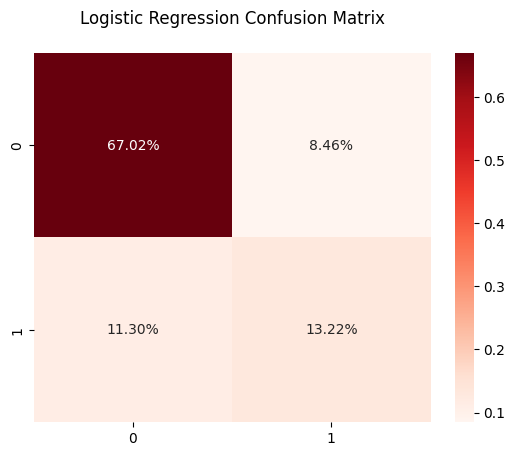

In [ ]:
# confusion Matrix

cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Logistic Regression Confusion Matrix\n",fontsize=12)
plt.show()

In [ ]:
g

In [ ]:
len(pred_lg)

1407

In [ ]:
#comparing the prediction values
print(f"Prediction value of first top 5 churn result {pred_lg[:5]} \n")
print(f"actual value of first top 5 churn result {y_test[[:5]} \n")

Prediction value of first top 5 churn result [0 0 1 0 0] 

actual value of first top 5 churn result 6226    0
3570    0
6798    0
6489    1
2819    0
Name: Churn, dtype: int64 



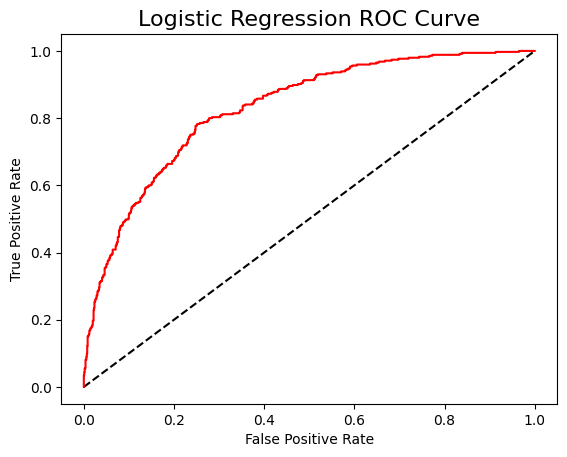

In [ ]:
y_pred_prob = model_lg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression ',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
#using Random forest calssification
# Creating model
model_rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=0.05, random_state=5)

In [ ]:

# Training the created Model
model_rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=0.05, n_estimators=200, random_state=5)

In [ ]:
# Making Prediction
pred_rf = model_rf.predict(x_test)

In [ ]:
pred_rf[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, pred_rf)*100, 2)
print(rf)

80.45


In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1062
           1       0.70      0.36      0.47       345

    accuracy                           0.80      1407
   macro avg       0.76      0.65      0.68      1407
weighted avg       0.79      0.80      0.78      1407



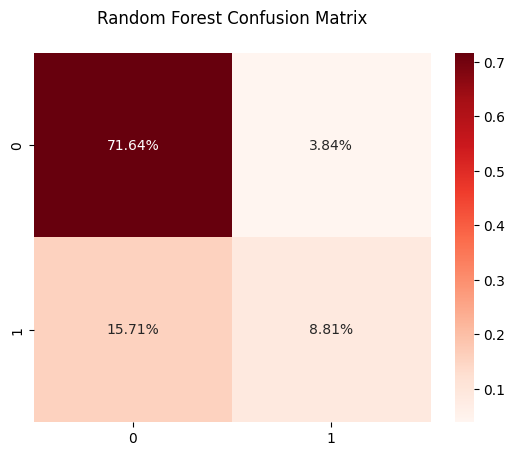

In [ ]:

cm1 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix\n",fontsize=12)
plt.show()

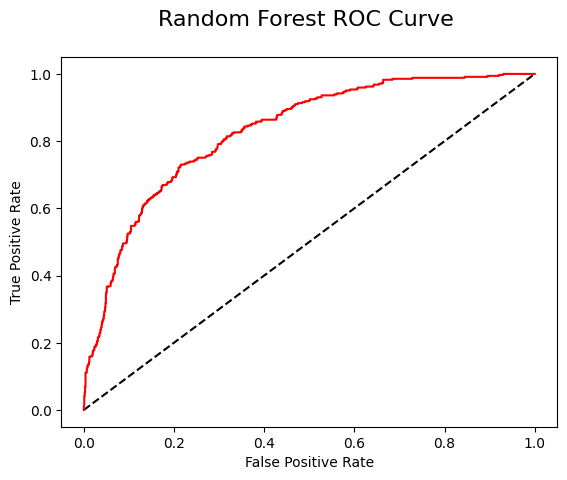

In [ ]:
y_rfpred_prob = model_rf.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve \n',fontsize=16)
plt.show();

In [ ]:
model_rf.pred

In [ ]:
#Using k-Nearest Neighbour classification
model_knn = KNeighborsClassifier(n_neighbors = 35)
model_knn.fit(x_train,y_train)
pred_knn= model_knn.predict(x_test)
accuracy_knn = model_knn.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7974413646055437


In [ ]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1062
           1       0.59      0.57      0.58       345

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.80      0.80      0.80      1407



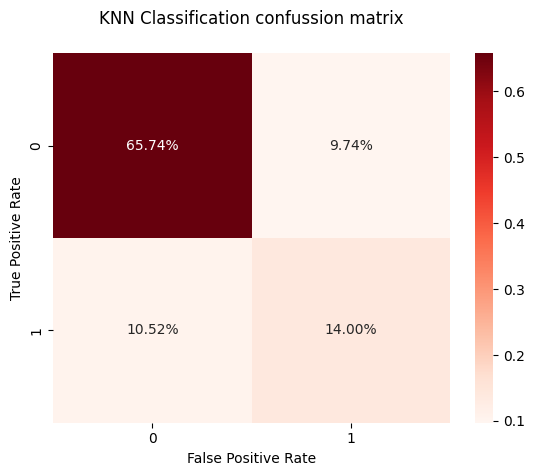

In [ ]:
cm = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm/np.sum(cm), annot=True, fmt = '0.2%', cmap='Reds')
#sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, fmt = 'd')
plt.title('KNN Classification confussion matrix\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#using support vector machine
model_svc = SVC(random_state = 2)
model_svc.fit(x_train,y_train)
pred_svc = model_svc.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8017057569296375


In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1062
           1       0.62      0.48      0.54       345

    accuracy                           0.80      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



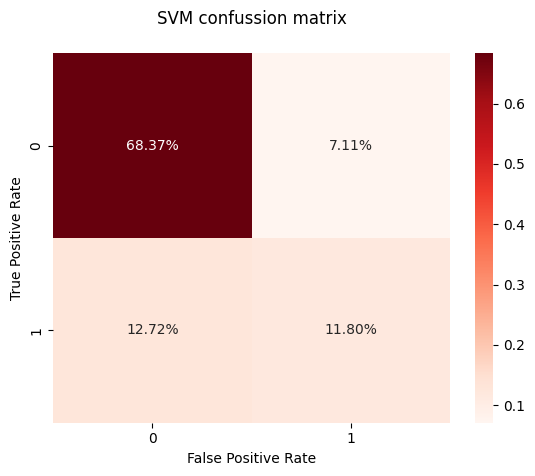

In [ ]:
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm/np.sum(cm), annot=True, fmt = '0.2%', cmap = 'Reds')
plt.title('SVM confussion matrix\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#Using ANN
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 26)                702       
                                                                 
 dense_4 (Dense)             (None, 20)                540       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,728
Trainable params: 1,728
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 6ms/step - loss: 0.2130 - accuracy: 0.9070
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.2087 - accuracy: 0.9072
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9086
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9127
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9109
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9067
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9076
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9044
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.2042 - accuracy: 0.9070
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.2052 - accura

In [ ]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 1.3030 - accuracy: 0.7292


[1.3029695749282837, 0.7292110919952393]

In [ ]:

model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 1.1204 - accuracy: 0.7271


[1.120408296585083, 0.727078914642334]

In [ ]:
yp = model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[2.3519173e-10],
       [7.5283174e-07],
       [9.4466430e-01],
       [3.4527004e-01],
       [9.6009976e-01]], dtype=float32)

In [ ]:
y_pred = []
for value in yp:
  if value > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]

In [ ]:
y_test[:10]

6226    0
3570    0
6798    0
6489    1
2819    0
4474    0
5887    0
3576    0
5144    0
6903    0
Name: Churn, dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1062
           1       0.61      0.57      0.59       345

    accuracy                           0.80      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



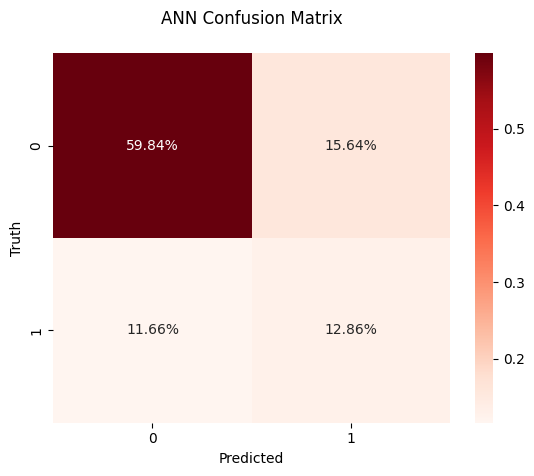

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("ANN Confusion Matrix\n",fontsize=12)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()